In [27]:
#Kerakli kutubxonalarni yuklab olamiz
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

In [28]:
#Rasmlarni yuklash va ko'rsatish uchun funksiya
def rasmni_korish(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

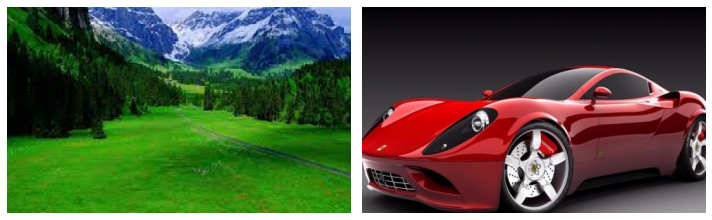

In [29]:
#Funksiyani ishlatamiz
img = cv.imread("download.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_2 = cv.imread("red.jpg")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

dim = (500, 300)
# resize image
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)

rasmni_korish(img, img_2)

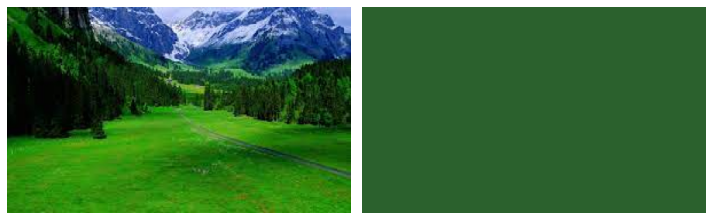

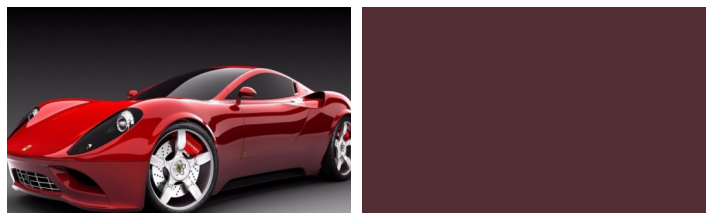

In [30]:
#1-usul => O'rtacha piksellari bilan
img_temp = img.copy()
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = np.average(img, axis=(0,1))

img_temp_2 = img_2.copy()
img_temp_2[:,:,0], img_temp_2[:,:,1], img_temp_2[:,:,2] = np.average(img_2, axis=(0,1))

rasmni_korish(img, img_temp)
rasmni_korish(img_2, img_temp_2)

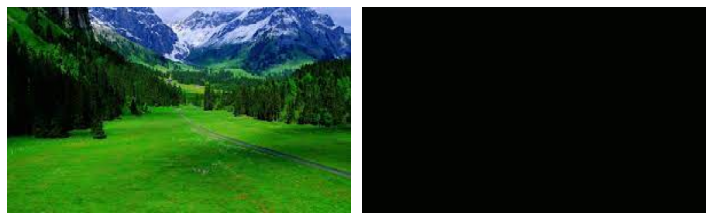

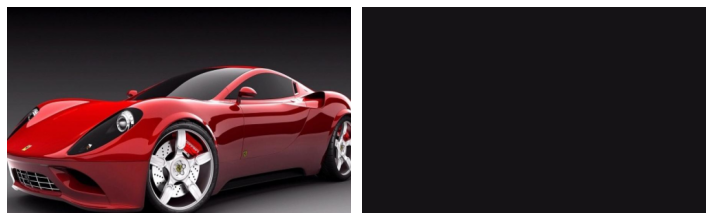

In [31]:
#2-usul eng yuqori piksel chastotasi
img_temp = img.copy()
unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = unique[np.argmax(counts)]

img_temp_2 = img_2.copy()
unique, counts = np.unique(img_temp_2.reshape(-1, 3), axis=0, return_counts=True)
img_temp_2[:,:,0], img_temp_2[:,:,1], img_temp_2[:,:,2] = unique[np.argmax(counts)]

rasmni_korish(img, img_temp)
rasmni_korish(img_2, img_temp_2)

In [32]:
from sklearn.cluster import KMeans

In [33]:
clt = KMeans(n_clusters=5)
clt.fit(img.reshape(-1, 3))

KMeans(n_clusters=5)

In [34]:
clt.labels_

array([4, 4, 4, ..., 0, 0, 0])

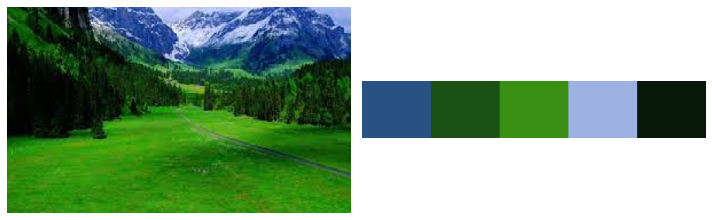

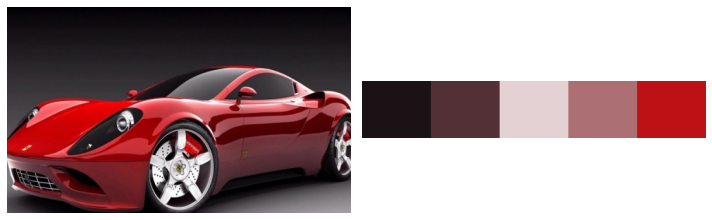

KMeans(n_clusters=5)

In [41]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

  
clt_1 = clt.fit(img.reshape(-1, 3))
rasmni_korish(img, palette(clt_1))

clt_2 = clt.fit(img_2.reshape(-1, 3))
rasmni_korish(img_2, palette(clt_2))
clt_2

In [43]:
clt_new = KMeans(n_clusters=1)

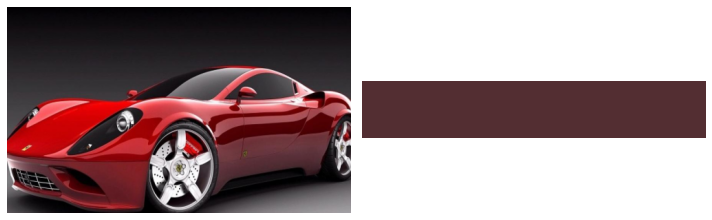

In [44]:
clt_2 = clt_new.fit(img_2.reshape(-1, 3))
rasmni_korish(img_2, palette(clt_2))

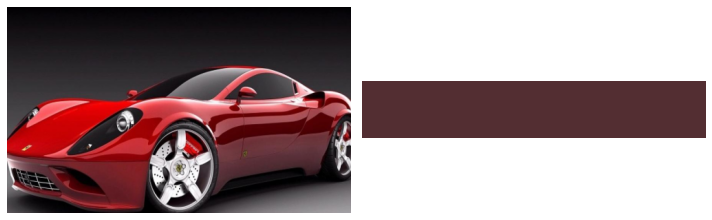

array([[[83, 46, 50],
        [83, 46, 50],
        [83, 46, 50],
        ...,
        [83, 46, 50],
        [83, 46, 50],
        [83, 46, 50]],

       [[83, 46, 50],
        [83, 46, 50],
        [83, 46, 50],
        ...,
        [83, 46, 50],
        [83, 46, 50],
        [83, 46, 50]],

       [[83, 46, 50],
        [83, 46, 50],
        [83, 46, 50],
        ...,
        [83, 46, 50],
        [83, 46, 50],
        [83, 46, 50]],

       ...,

       [[83, 46, 50],
        [83, 46, 50],
        [83, 46, 50],
        ...,
        [83, 46, 50],
        [83, 46, 50],
        [83, 46, 50]],

       [[83, 46, 50],
        [83, 46, 50],
        [83, 46, 50],
        ...,
        [83, 46, 50],
        [83, 46, 50],
        [83, 46, 50]],

       [[83, 46, 50],
        [83, 46, 50],
        [83, 46, 50],
        ...,
        [83, 46, 50],
        [83, 46, 50],
        [83, 46, 50]]], dtype=uint8)

In [46]:
color = rasmni_korish(img_2, palette(clt_2))
color
palette(clt_2)